In [32]:
import os
import cv2  # Or use from PIL import Image

# Specify the path to the folder containing images
image_folder = r'C:\Users\91944\Downloads\images_project'

# List to store images and their labels
images = []
labels = []

# Process files in the folder
for file_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, file_name)
    # Check if it's a file (not a folder)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)  # Or use Image.open(img_path) with PIL
        if img is not None:
            images.append(img)
            labels.append(file_name)  # Label as the file name or another labeling strategy

print(f"Loaded {len(images)} images.")


Loaded 12 images.


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


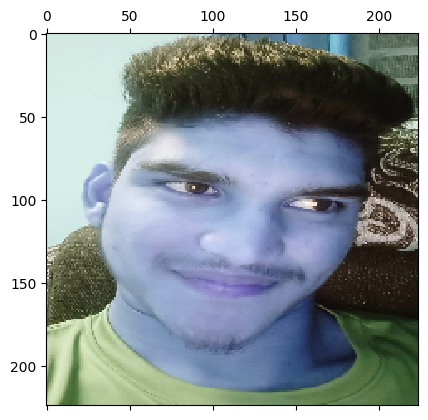

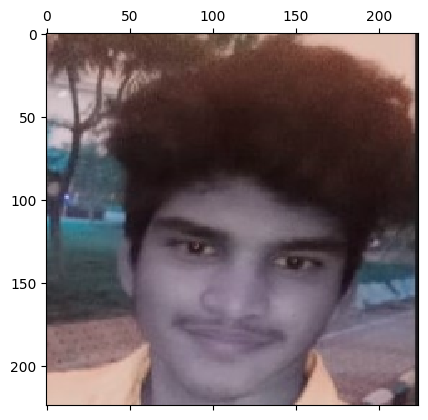

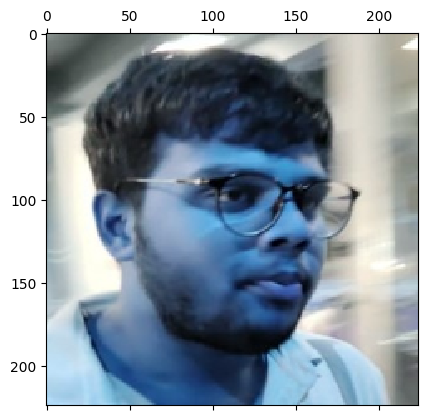

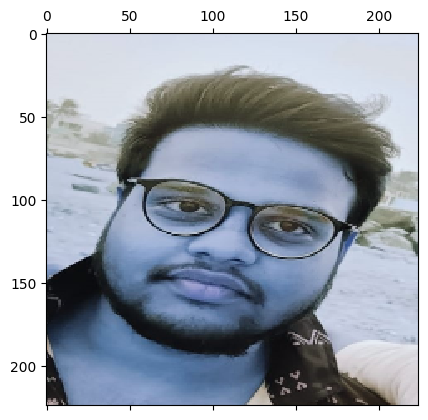

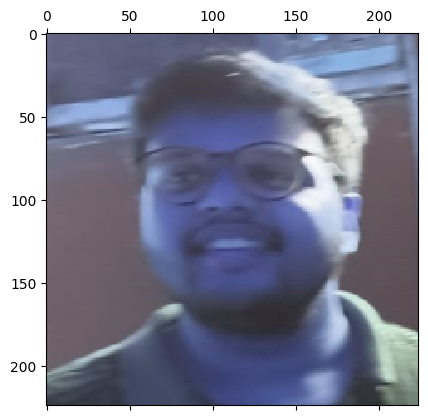

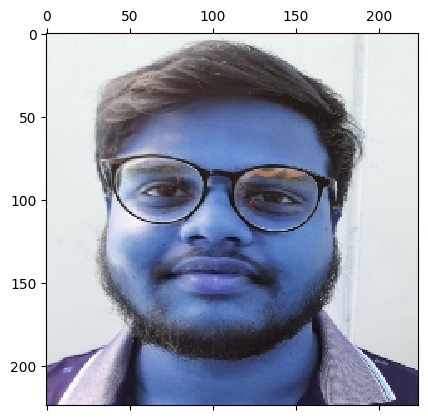

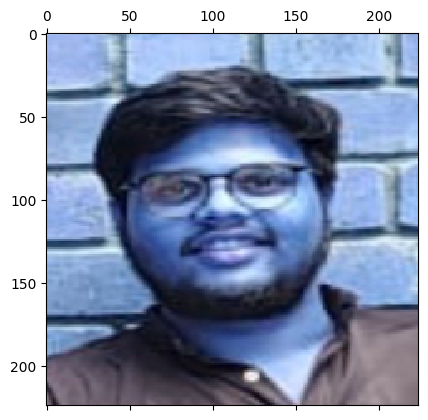

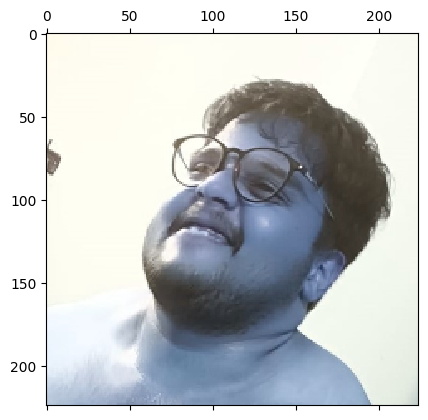

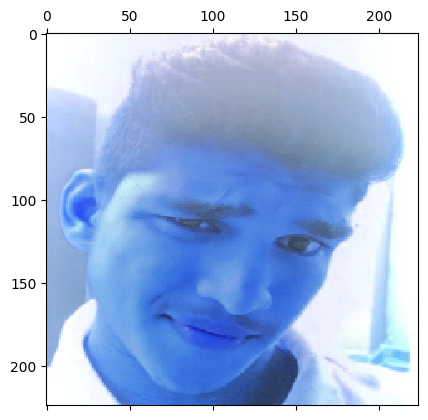

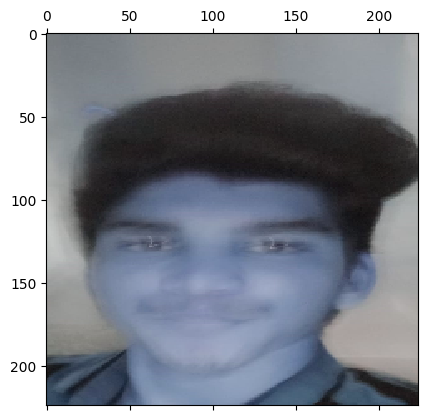

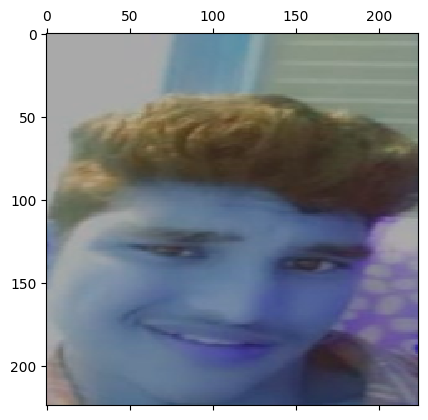

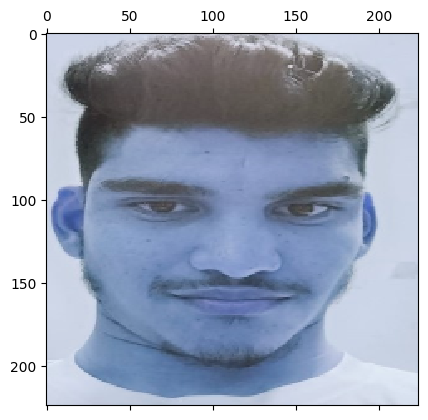

In [35]:
x_train=[]
for i in images:
    resized=cv2.resize(i,(224,224))
    x_train.append(resized)
    print(resized.shape)
    plt.matshow(resized)


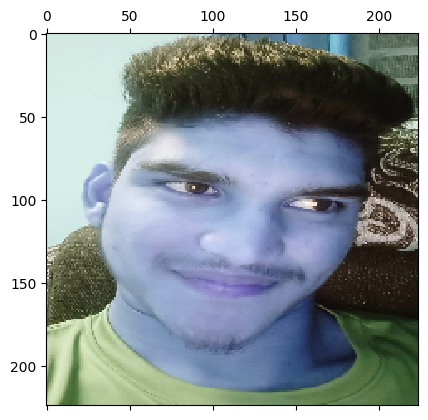

In [59]:
plt.matshow(x_train[0])

In [79]:
y_train=[0,0,1,1,1,1,1,1,0,0,0,0]

In [61]:
#normalization
import numpy as np
x_train1=np.array(x_train)/255

In [66]:
x_train1.shape
y_train[:5]
classes=["chanti","bhuvan"]

In [68]:
#now model building
import tensorflow as tf
from tensorflow import keras
from keras import layers,models


2

In [80]:
#convolutional nw=eural network
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])
cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [88]:
cnn.fit(x_train1,y_train,epochs=30)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7091
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.7176
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 16.4471
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step - accuracy: 0.6667 - loss: 0.8833
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step - accuracy: 0.5000 - loss: 6.1921
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step - accuracy: 0.5000 - loss: 5.8534
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step - accuracy: 0.5833 - loss: 1.7153
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step - accuracy: 0.9167 - loss: 0.1215
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step - accuracy: 0.5000 - loss: 1.7625
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step - accuracy: 0.6667 - loss: 0.5695
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - accuracy: 1.0000 - loss: 0.0369
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.5397


In [106]:
pred=cnn.predict(x_test_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


In [109]:
pred1=np.argmax(pred)
classes[pred1]

'chanti'

In [104]:
test1.shape
test1[:2]

array([[[0.54901961, 0.55294118, 0.5372549 ],
        [0.54117647, 0.54509804, 0.52941176],
        [0.53333333, 0.5372549 , 0.52156863],
        ...,
        [0.49019608, 0.49019608, 0.42745098],
        [0.49411765, 0.50196078, 0.43137255],
        [0.50196078, 0.50980392, 0.43529412]],

       [[0.54509804, 0.54901961, 0.53333333],
        [0.54117647, 0.54117647, 0.5254902 ],
        [0.53333333, 0.5372549 , 0.52156863],
        ...,
        [0.48627451, 0.49019608, 0.42745098],
        [0.49019608, 0.49803922, 0.43137255],
        [0.49803922, 0.50196078, 0.43529412]]])

In [87]:
y_train=np.array(y_train)
y_train.shape

(12,)

In [105]:
x_test_reshaped = np.expand_dims(test1, axis=0)

In [89]:
test=cv2.imread(r"C:\Users\91944\Downloads\testing\t.jpg")


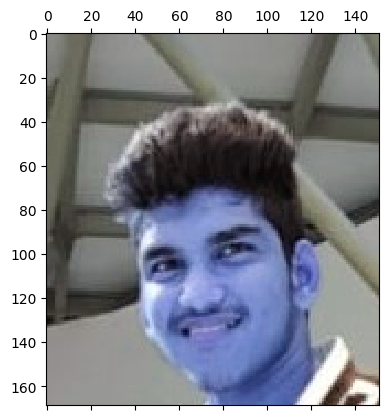

In [97]:
plt.matshow(test)
test1=cv2.resize(test,(224,224))
test1=test1/255

In [82]:
import numpy as np
x_train1 = np.array(x_train1).astype('float32')